#### DATA WAREHOUSING AND DATA MINING 
>Section: E                                                                                                                    
>Name: Hamid Kawsar                                                                                                            
>ID: 19-40077-1

   #          Answer To The Question No 2

### LinearRegression

##### Import all necessary dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
df=pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


##### Split dataset and Model selection

In [5]:
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
model=LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
pd.DataFrame(model.coef_,X.columns,columns=['Con'])

,Con
No,-0.005617
X1 transaction date,5.407435
X2 house age,-0.267828
X3 distance to the nearest MRT station,-0.004815
X4 number of convenience stores,1.081144
X5 latitude,226.048799
X6 longitude,-30.125491


In [10]:
y_predict=model.predict(X_test)

In [11]:
pd.DataFrame({'Y_test':y_test,'Y_predict':y_predict})

,Y_test,Y_predict
358,45.1,47.046459
350,42.3,40.407830
373,52.2,43.374640
399,37.3,39.206004
369,22.8,26.628180
...,...,...
31,25.0,41.374120
283,23.5,32.651543
157,35.6,42.608531
203,46.1,43.398779


##### check accuracy

In [12]:
MAE=metrics.mean_absolute_error(y_test,y_predict)
MSE=metrics.mean_squared_error(y_test,y_predict)
RMSE=np.sqrt(MSE)

In [13]:
MSE,MAE,RMSE

(54.60196067337713, 5.4180350986290415, 7.389313951469184)

In [14]:
df['Y house price of unit area'].mean()

37.980193236714975

In [15]:
RES_test=y_test-y_predict
pd.DataFrame({'Y_test':y_test,'Y_predict':y_predict,'RES':RES_test})

,Y_test,Y_predict,RES
358,45.1,47.046459,-1.946459
350,42.3,40.407830,1.892170
373,52.2,43.374640,8.825360
399,37.3,39.206004,-1.906004
369,22.8,26.628180,-3.828180
...,...,...,...
31,25.0,41.374120,-16.374120
283,23.5,32.651543,-9.151543
157,35.6,42.608531,-7.008531
203,46.1,43.398779,2.701221


<AxesSubplot:xlabel='Y house price of unit area'>

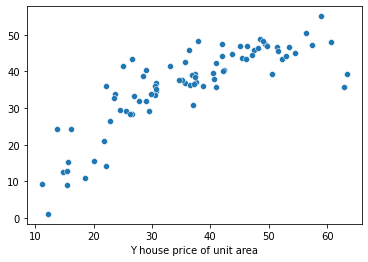

In [16]:
sns.scatterplot(x=y_test,y=y_predict)

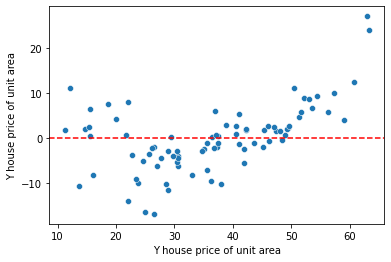

In [17]:
sns.scatterplot(x=y_test,y=RES_test)
plt.axhline(y=0,color='r',ls='--')

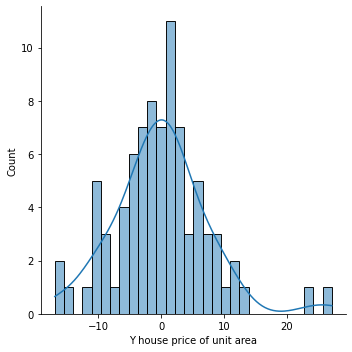

In [18]:
sns.displot(RES_test,bins=30, kde=True)

   #          Answer To The Question No 3


### K Means Clustring

###### import Required libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs

##### get dataset

here we use scikit learn dataset.

In [20]:
dataset=make_blobs(n_samples=200,centers=4,cluster_std=1.6,random_state=50)

In [21]:
dataset

(array([[-1.06705283e+00,  9.24306355e+00],
        [ 1.08654318e+00, -6.94815805e+00],
        [-2.30970265e+00,  5.84969440e+00],
        [-1.59728965e+00,  8.45369045e+00],
        [-5.79816711e+00, -3.78405528e+00],
        [-2.29833776e+00, -4.66005371e+00],
        [-1.68210799e+00,  1.12843423e+01],
        [-7.38296450e-01, -5.20135260e+00],
        [-1.92048345e-01, -6.45318764e+00],
        [-6.37920287e+00, -2.17672355e+00],
        [-5.12054803e+00, -2.91449176e+00],
        [-4.22297649e+00,  9.04719945e+00],
        [-2.67815731e+00, -2.32828819e+00],
        [-3.02994109e+00,  1.86959382e+00],
        [-5.73938121e+00, -7.25648845e-01],
        [-1.99427571e+00,  4.28616868e+00],
        [-2.89522086e+00,  1.10222354e+01],
        [-1.11286937e+00,  1.03086380e+01],
        [-5.19987051e+00, -1.59879364e+00],
        [-4.75916597e+00, -1.97047767e+00],
        [-6.76865308e+00, -3.56907573e+00],
        [-2.65715781e+00,  3.33763714e+00],
        [-4.61722463e+00,  1.063

In [22]:
points=dataset[0]

In [23]:
len(points)

200

###### Model selection

In [24]:
# import K MEANS
from sklearn.cluster import KMeans

# Create K Means object
kmeans=KMeans(n_clusters=4)

# Fit the Kmeans object to the dataset
kmeans.fit(points)

KMeans(n_clusters=4)

> Here purple color Star known as centroid, which is the center point of the the cluster


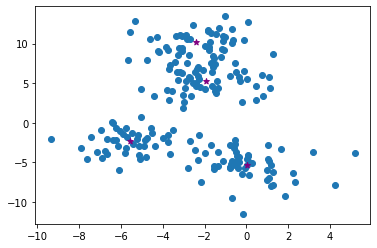

In [25]:
plt.scatter(points[:,0],points[:,1]);
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="purple",marker="*",label='centroid');

In [26]:
clusters=kmeans.cluster_centers_

In [27]:
clusters

array([[-2.40167949, 10.17352695],
       [-5.56465793, -2.34988939],
       [ 0.05161133, -5.35489826],
       [-1.92101646,  5.21673484]])

In [28]:
y_km=kmeans.fit_predict(points)
y_km

array([0, 2, 3, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 3, 1, 3, 0, 0, 1, 1, 1, 3,
       0, 0, 0, 3, 0, 2, 3, 0, 0, 1, 1, 2, 2, 1, 1, 1, 3, 3, 0, 1, 3, 3,
       2, 2, 0, 3, 3, 0, 2, 1, 3, 0, 3, 3, 2, 1, 1, 3, 2, 2, 0, 2, 2, 0,
       2, 3, 0, 0, 2, 1, 0, 2, 3, 3, 1, 3, 3, 2, 1, 3, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 3, 3, 1, 2, 3, 2, 3, 1, 2, 3, 0, 3, 2, 3, 2, 1, 0,
       2, 1, 0, 0, 1, 3, 0, 0, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 3, 2, 1, 2,
       2, 3, 0, 3, 2, 0, 0, 1, 0, 3, 3, 2, 1, 0, 2, 3, 2, 1, 0, 1, 3, 2,
       2, 3, 0, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 2, 1, 3, 2, 3,
       1, 2, 0, 3, 2, 3, 3, 0, 1, 2, 1, 0, 3, 2, 3, 3, 1, 3, 2, 0, 1, 3,
       1, 0])

In [29]:
dataset[1]

array([2, 0, 3, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 3,
       0, 0, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0, 0, 2, 0, 0, 2,
       0, 3, 2, 2, 0, 1, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 3, 3, 1, 0, 3, 0, 3, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 1, 0,
       0, 3, 2, 3, 0, 2, 2, 1, 2, 3, 2, 1, 1, 2, 0, 3, 0, 1, 2, 1, 3, 0,
       0, 3, 2, 0, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 2,
       1, 0, 2, 3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 3, 3, 1, 3, 0, 2, 1, 3,
       1, 2])

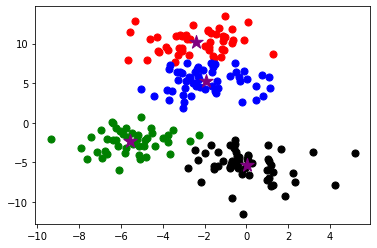

In [30]:
plt.scatter(points[y_km==0,0],points[y_km==0,1],s=50,color='red')
plt.scatter(points[y_km==1,0],points[y_km==1,1],s=50,color='green')
plt.scatter(points[y_km==2,0],points[y_km==2,1],s=50,color='black')
plt.scatter(points[y_km==3,0],points[y_km==3,1],s=50,color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="purple",marker="*",s=200,label='centroid');

### DBSCAN clustring

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


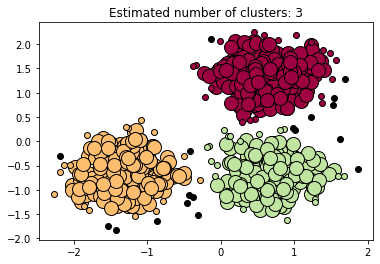

In [31]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Hierarchical clustring

In [32]:
# Hierarchical Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# Importing the dataset
dataset = pd.read_csv('Wholesale.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [34]:
#X = dataset.iloc[:, [3, 4]].values
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
data_scaled.head()
X=data_scaled
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


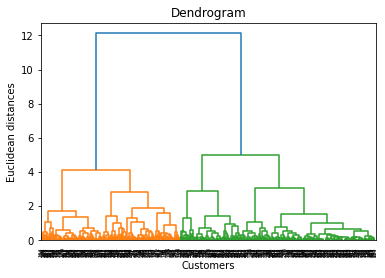

In [35]:


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [36]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

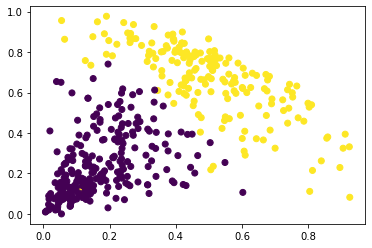

In [37]:
# Visualising the clusters
#plt.figure(figsize=(10, 7))  
plt.scatter(X['Milk'], X['Grocery'], c=hc.labels_) 